# Part II - (Prosper Loan Data)
## by (Purity Chepkurui)

## Investigation Overview


> The essence of the investigation into the Prosper loan data is to be able to predict borrower APR based on some provided loan information. The focus of my analysis is on Loan amount, Term, Year, Employee Status, Stated Income, Debt to Income Ratio, Occupation etc.


## Dataset Overview

> The dataset (ProsperLoanData) contains 113937 entries and 81 columns across the loan and borrowers information. There are numeric and qualitative data in the dataset. The LoanStatus, LoanOriginalAmount and ProsperScore are some very important columns in the data.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')
df.head(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158


## Relationship between Loan Original Amount and Monthly Loan Payment

>LoanOriginalAmount and Monthly Loan Payment have a positive correlation. The more the LoanOriginalAmount the more the MonthlyLoanPayment. As the loan amount increases so does the monthly loan payments.




Text(0.5, 1.0, 'LoanOriginalAmount vs MonthlyLoanPayment')

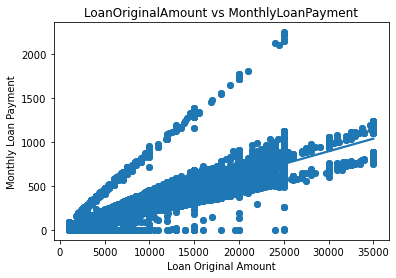

In [15]:
# Scatter plot of LoanOriginalAmount and MonthlyLoanPayment
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')

sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('LoanOriginalAmount vs MonthlyLoanPayment')

## The effect of ProsperScore on Loan Status

> Prosper score  ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1. * Borrowers with Prosperscore of 1 have the highest Chargedoff loans
* Borrowers with ProsperScore of 9 and 1 have the highest Completed loans
* Borrowers with ProsperScore of 11 have majority of their loans being Current
* Borrowers with ProsperScore 1 have the highest number of defaulted loans
* The higher the ProsperScore the lower the rates of defaulted loans.

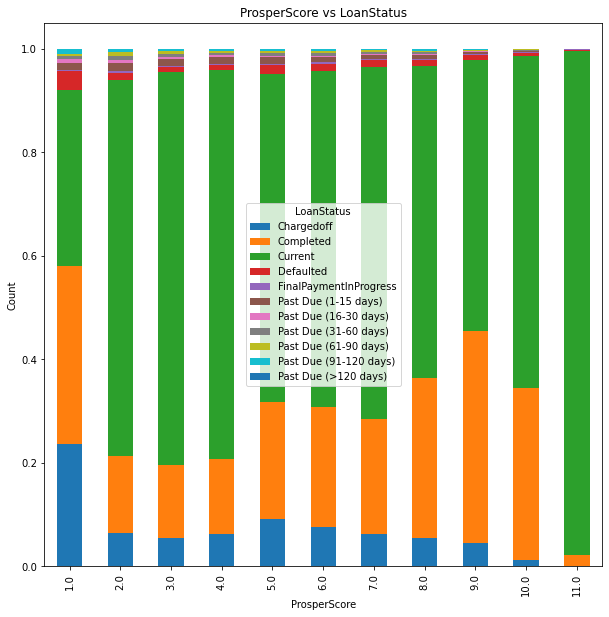

In [16]:
#prosperscore vs loanstatus
occup= pd.crosstab(df['ProsperScore'], df['LoanStatus'])
occup.div(occup.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,10))
plt.title('ProsperScore vs LoanStatus');
plt.ylabel('Count')
plt.show()

## How term affects Loan Status
>
* Loans whose term is 1 year have a higher completed status.
* Loans whose term is 5 years have a higher current status.
* The shorter the term of the loan the higher the chances of being completed.

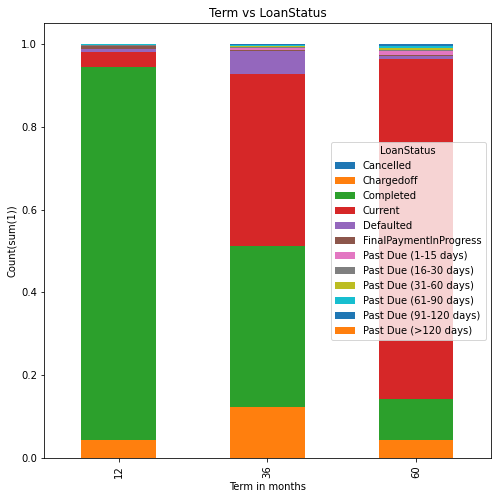

In [17]:
#term vs loan status
term= pd.crosstab(df['Term'], df['LoanStatus'])
term.div(term.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Term vs LoanStatus');
plt.xlabel('Term in months')
plt.ylabel('Count(sum(1))')
plt.show()

## Effect of Income Range on the Loan Status
>

* Income Range 50k-74999 has the highest current loans
* 25k-49999 has the highest completed as well as the highest charged off.
* Income Not displayed has the highest defaulted loan.


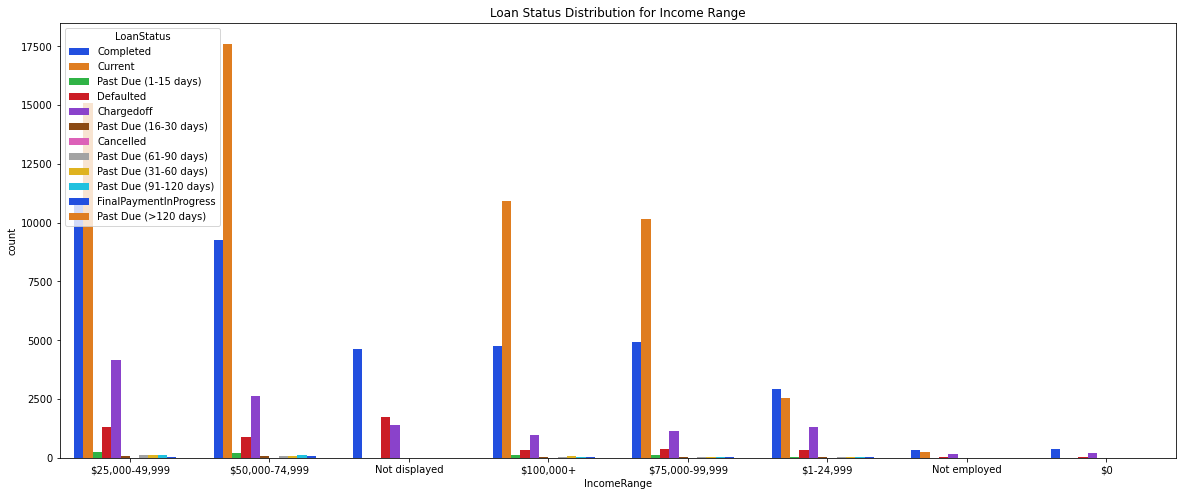

In [18]:
plt.figure(figsize = [20, 8])
sb.countplot(data = df, x = 'IncomeRange', hue = 'LoanStatus', palette='bright')
plt.title('Loan Status Distribution for Income Range');

## Relationship between LoanOriginalAmount, MonthlyLoanPayment and Term
>
* The lower the term, the higher the monthly loan payments, as seen with 12 months term having the highest monthly loan payments.
* The longer the term, the higher the loan original amount.

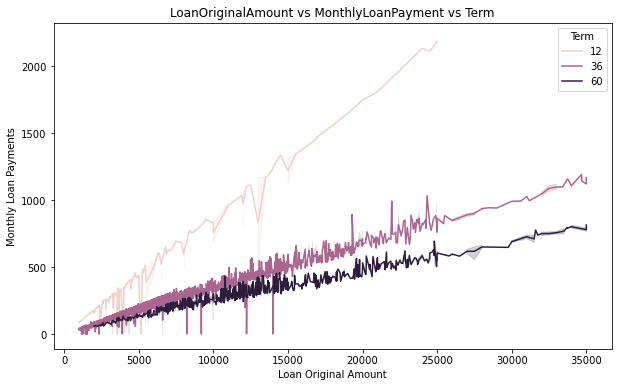

In [19]:
#monthly loan payment vs loanOriginalAmount vs Term
plt.figure(figsize = [10, 6])
sb.lineplot(data=df, x = 'LoanOriginalAmount', y='MonthlyLoanPayment', hue='Term')
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payments')
plt.title('LoanOriginalAmount vs MonthlyLoanPayment vs Term');

In [25]:
!jupyter nbconvert <Part_II_slide_deck_template.ipynb>.ipynb --to slides --post serve --no-input --no-prompt